## Data Collection

In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [68]:
import glob
import warnings
from warnings import filterwarnings
filterwarnings('ignore')

In [69]:
glob.glob(r'individual_stocks_5yr/*csv')

['individual_stocks_5yr\\AAL_data.csv',
 'individual_stocks_5yr\\AAPL_data.csv',
 'individual_stocks_5yr\\AAP_data.csv',
 'individual_stocks_5yr\\ABBV_data.csv',
 'individual_stocks_5yr\\ABC_data.csv',
 'individual_stocks_5yr\\ABT_data.csv',
 'individual_stocks_5yr\\ACN_data.csv',
 'individual_stocks_5yr\\ADBE_data.csv',
 'individual_stocks_5yr\\ADI_data.csv',
 'individual_stocks_5yr\\ADM_data.csv',
 'individual_stocks_5yr\\ADP_data.csv',
 'individual_stocks_5yr\\ADSK_data.csv',
 'individual_stocks_5yr\\ADS_data.csv',
 'individual_stocks_5yr\\AEE_data.csv',
 'individual_stocks_5yr\\AEP_data.csv',
 'individual_stocks_5yr\\AES_data.csv',
 'individual_stocks_5yr\\AET_data.csv',
 'individual_stocks_5yr\\AFL_data.csv',
 'individual_stocks_5yr\\AGN_data.csv',
 'individual_stocks_5yr\\AIG_data.csv',
 'individual_stocks_5yr\\AIV_data.csv',
 'individual_stocks_5yr\\AIZ_data.csv',
 'individual_stocks_5yr\\AJG_data.csv',
 'individual_stocks_5yr\\AKAM_data.csv',
 'individual_stocks_5yr\\ALB_data.c

In [70]:
len(glob.glob(r'individual_stocks_5yr/*csv'))

505

In [71]:
company_list = [r'individual_stocks_5yr\\AAPL_data.csv',
                r'individual_stocks_5yr\\AMGN_data.csv',
                r'individual_stocks_5yr\\GOOG_data.csv',
                r'individual_stocks_5yr\\MSFT_data.csv'
               ]

In [72]:
all_data = pd.DataFrame()

for file in company_list:
    current_df = pd.read_csv(file)
    all_data = current_df.append(all_data, ignore_index=True)

In [73]:
all_data.shape

(4752, 7)

In [74]:
all_data.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,27.35,27.71,27.31,27.55,33318306,MSFT
1,2013-02-11,27.65,27.92,27.50,27.86,32247549,MSFT
2,2013-02-12,27.88,28.00,27.75,27.88,35990829,MSFT
3,2013-02-13,27.93,28.11,27.88,28.03,41715530,MSFT
4,2013-02-14,27.92,28.06,27.87,28.04,32663174,MSFT


In [75]:
all_data['Name'].unique()

array(['MSFT', 'GOOG', 'AMGN', 'AAPL'], dtype=object)

## Analysing change in price of the stock overtime!

In [76]:
all_data.isnull().sum()

date      0
open      0
high      0
low       0
close     0
volume    0
Name      0
dtype: int64

In [77]:
all_data.dtypes

date       object
open      float64
high      float64
low       float64
close     float64
volume      int64
Name       object
dtype: object

In [78]:
all_data['date'] = pd.to_datetime(all_data['date'])

In [79]:
all_data['date']

0      2013-02-08
1      2013-02-11
2      2013-02-12
3      2013-02-13
4      2013-02-14
          ...    
4747   2018-02-01
4748   2018-02-02
4749   2018-02-05
4750   2018-02-06
4751   2018-02-07
Name: date, Length: 4752, dtype: datetime64[ns]

In [80]:
tech_list = all_data['Name'].unique()

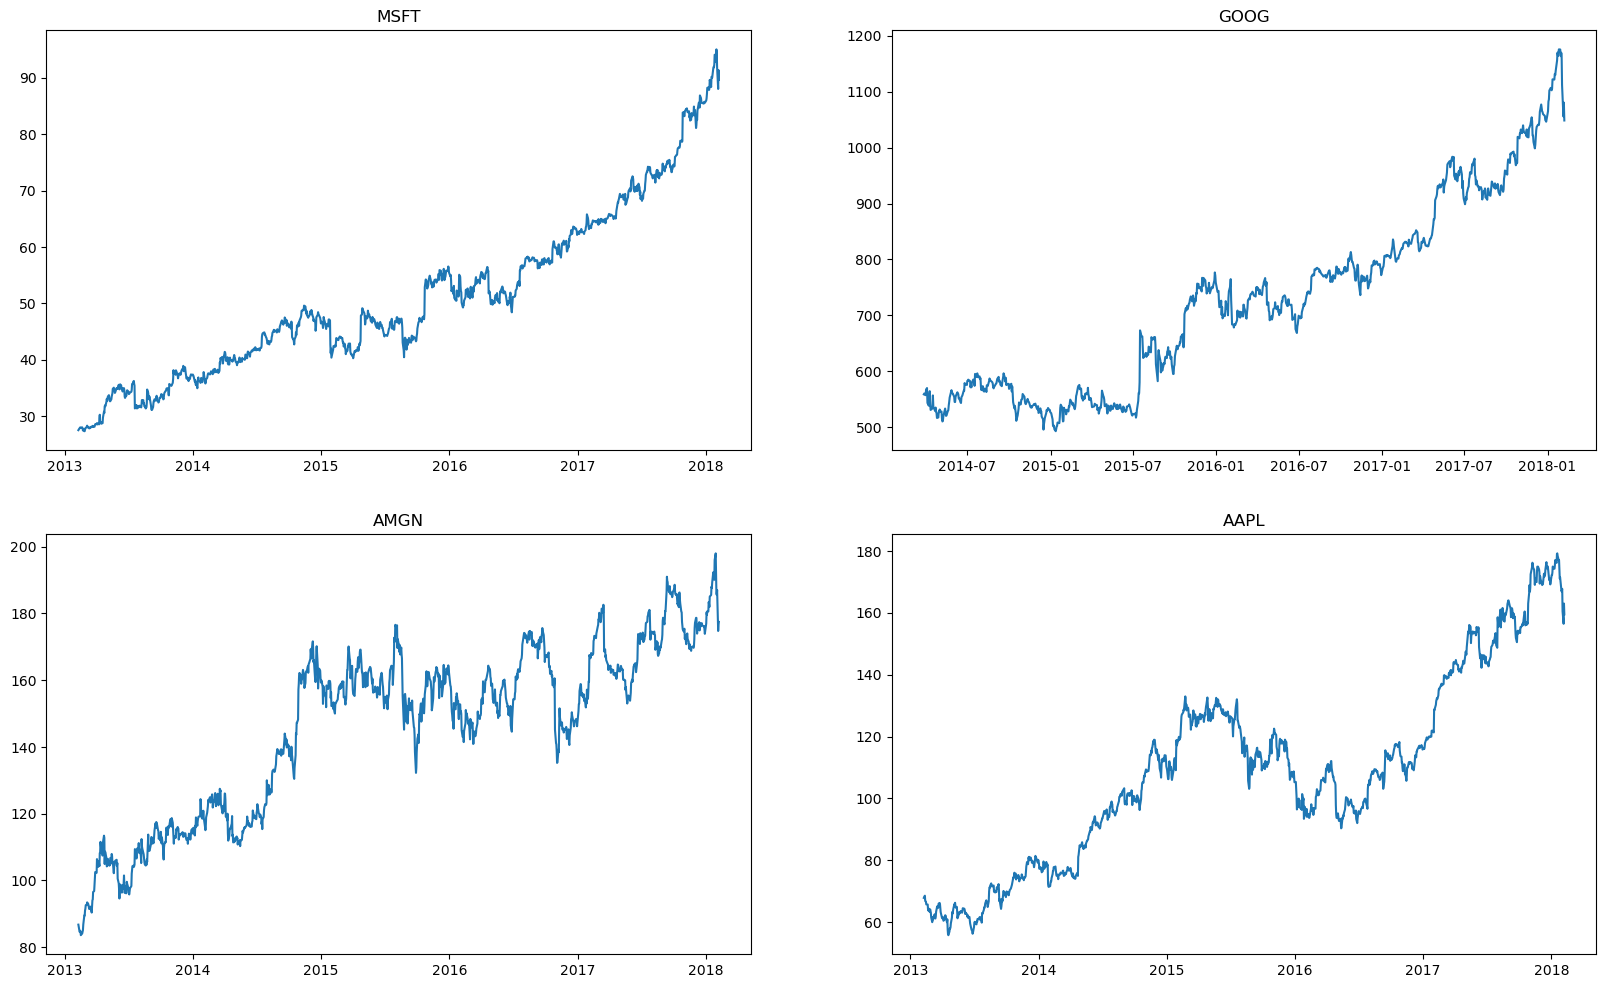

In [81]:
plt.figure(figsize=(20,12))

for index, company in enumerate(tech_list, 1):
    plt.subplot(2, 2, index)
    filter1 = all_data['Name'] == company
    df = all_data[filter1]
    plt.plot(df['date'], df['close'])
    plt.title(company)

## Moving average of the various Stocks !

In [82]:
all_data.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,27.35,27.71,27.31,27.55,33318306,MSFT
1,2013-02-11,27.65,27.92,27.50,27.86,32247549,MSFT
2,2013-02-12,27.88,28.00,27.75,27.88,35990829,MSFT
3,2013-02-13,27.93,28.11,27.88,28.03,41715530,MSFT
4,2013-02-14,27.92,28.06,27.87,28.04,32663174,MSFT


In [83]:
all_data.rolling(window=10).mean().head(14)

,open,high,low,close,volume
0,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN
9,27.82001,27.975,27.6525,27.8535,38900401.8


In [84]:
new_data = all_data.copy()

In [85]:
ma_day = [10, 20, 30]

for ma in ma_day:
    new_data['close'+str(ma)] = new_data['close'].rolling(ma).mean()

In [86]:
new_data.tail()

,date,open,high,low,close,volume,Name,close10,close20,close30
4747,2018-02-01,167.165,168.62,166.7600,167.78,47230787,AAPL,171.948,173.8700,173.409333
4748,2018-02-02,166.000,166.80,160.1000,160.50,86593825,AAPL,170.152,173.2435,172.941333
4749,2018-02-05,159.100,163.88,156.0000,156.49,72738522,AAPL,168.101,172.3180,172.346000
4750,2018-02-06,154.830,163.72,154.0000,163.03,68243838,AAPL,166.700,171.7520,171.946667
4751,2018-02-07,163.085,163.40,159.0685,159.54,51608580,AAPL,165.232,171.0125,171.431000


In [87]:
new_data.set_index('date', inplace=True)

In [88]:
new_data

,open,high,low,close,volume,Name,close10,close20,close30
date,,,,,,,,,
2013-02-08,27.350,27.71,27.3100,27.55,33318306,MSFT,NaN,NaN,NaN
2013-02-11,27.650,27.92,27.5000,27.86,32247549,MSFT,NaN,NaN,NaN
2013-02-12,27.880,28.00,27.7500,27.88,35990829,MSFT,NaN,NaN,NaN
2013-02-13,27.930,28.11,27.8800,28.03,41715530,MSFT,NaN,NaN,NaN
2013-02-14,27.920,28.06,27.8700,28.04,32663174,MSFT,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2018-02-01,167.165,168.62,166.7600,167.78,47230787,AAPL,171.948,173.8700,173.409333
2018-02-02,166.000,166.80,160.1000,160.50,86593825,AAPL,170.152,173.2435,172.941333
2018-02-05,159.100,163.88,156.0000,156.49,72738522,AAPL,168.101,172.3180,172.346000


In [89]:
new_data.columns

Index(['open', 'high', 'low', 'close', 'volume', 'Name', 'close10', 'close20',
       'close30'],
      dtype='object')

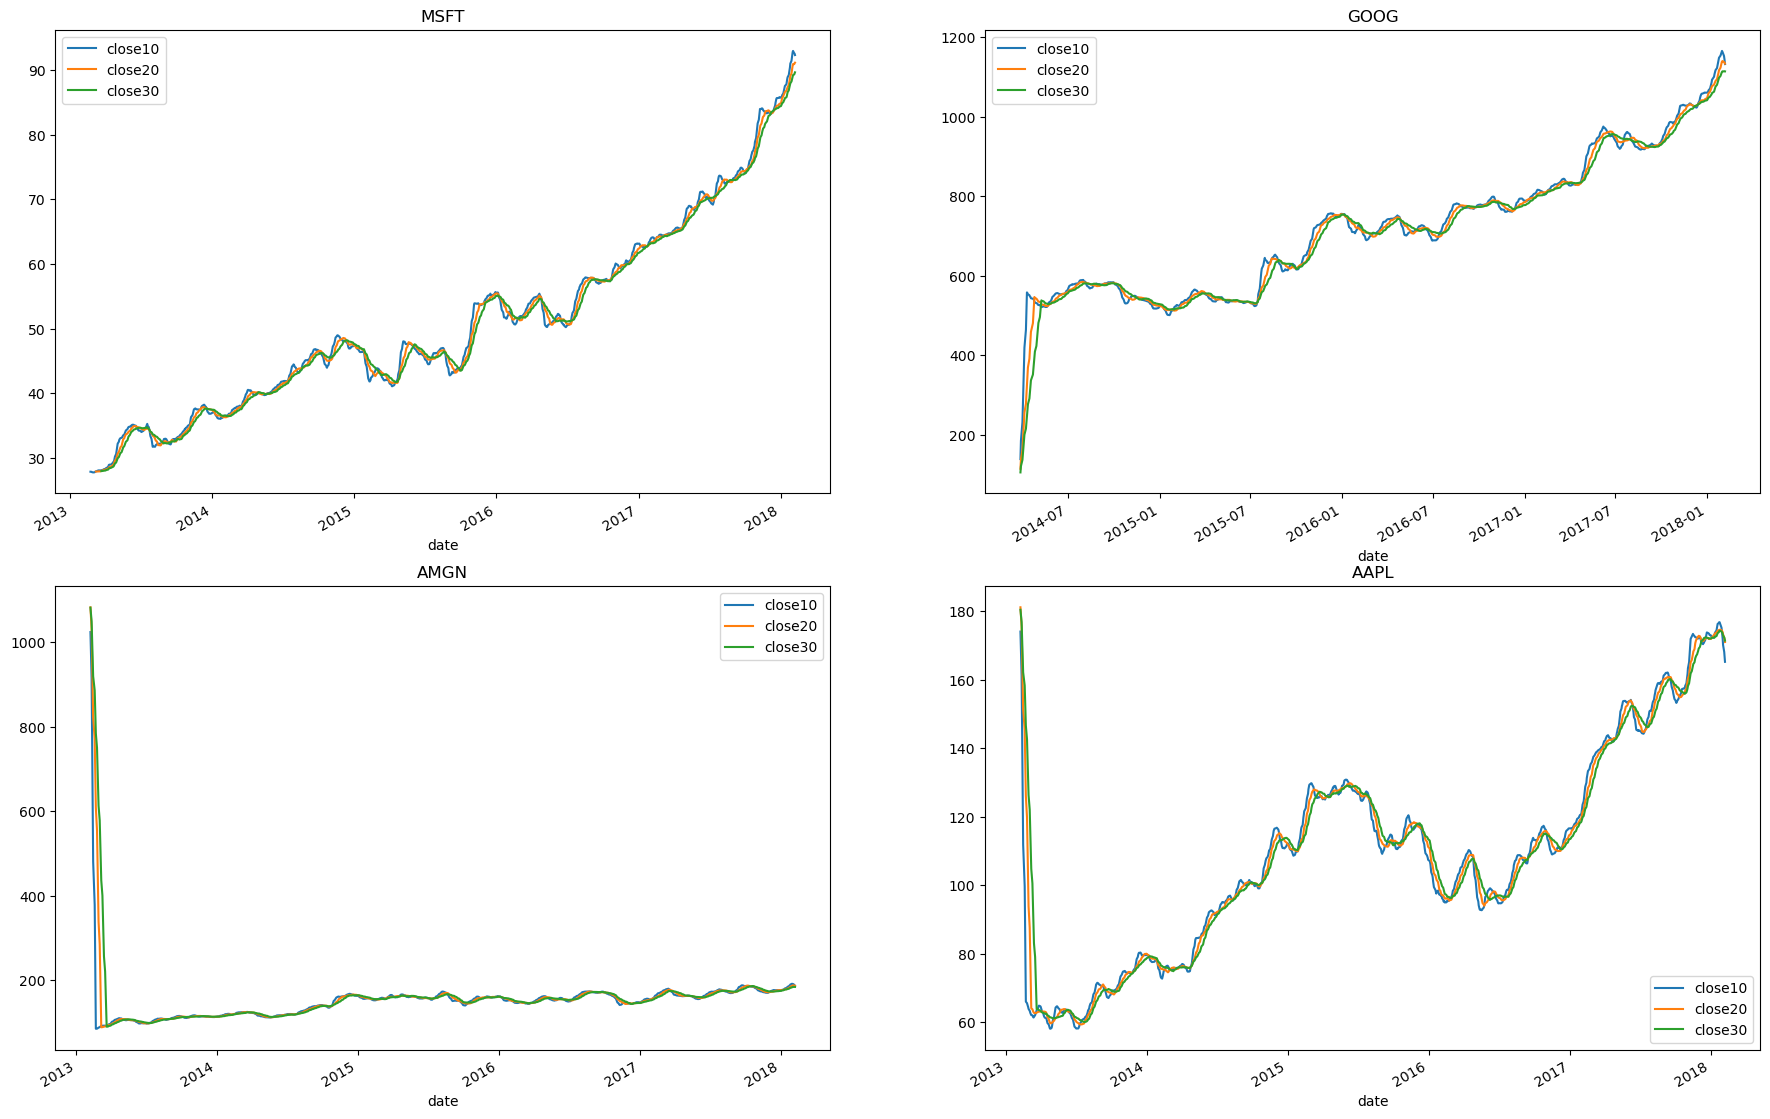

In [90]:
plt.figure(figsize=(22,15))

for index, company in enumerate(tech_list, 1):
    plt.subplot(2, 2, index)
    filter1 = new_data['Name'] == company
    df = new_data[filter1]
    df[['close10', 'close20', 'close30']].plot(ax=plt.gca())
    plt.title(company)

## Analyse Closing price change in apple stock !
##### Daily Stock Return Formula
    To calculate how much you gained or lost per day for a stock, subtract the opening price from the closing price. Then, multiply the result by the number of shares you own in the company. 

In [91]:
apple_data = pd.read_csv(r'individual_stocks_5yr\\\\AAPL_data.csv')

In [92]:
apple_data.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL
4,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL


In [93]:
apple_data['close']

0        67.8542
1        68.5614
2        66.8428
3        66.7156
4        66.6556
          ...   
1254    167.7800
1255    160.5000
1256    156.4900
1257    163.0300
1258    159.5400
Name: close, Length: 1259, dtype: float64

In [94]:
apple_data['Daily return (in %)'] = apple_data['close'].pct_change() * 100
# percentage change

In [95]:
apple_data.head()

,date,open,high,low,close,volume,Name,Daily return (in %)
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL,NaN
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL,1.042235
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL,-2.506658
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL,-0.190297
4,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL,-0.089934


In [96]:
import plotly.express as px 

In [97]:
px.line(apple_data, x="date", y="Daily return (in %)")

## Performing resampling analysis of closing price.

Before doing resampling,first have to make your date feature 'row-index' so that u can resample data on various basis :
    
    a..yearly('Y')  , 
    b..quarterly('Q')   ,
    c..monthly('M') ,
    d..weekly basis ('W'), 
    e..Daily_basis('D')  
    f..minutes ('3T') , 
    g..30 second bins('30S')   ,
    h..resample('17min')

In [98]:
apple_data.dtypes

date                    object
open                   float64
high                   float64
low                    float64
close                  float64
volume                   int64
Name                    object
Daily return (in %)    float64
dtype: object

In [99]:
apple_data['date'] = pd.to_datetime(apple_data['date'])

In [100]:
apple_data.dtypes

date                   datetime64[ns]
open                          float64
high                          float64
low                           float64
close                         float64
volume                          int64
Name                           object
Daily return (in %)           float64
dtype: object

In [101]:
apple_data.head()

,date,open,high,low,close,volume,Name,Daily return (in %)
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL,NaN
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL,1.042235
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL,-2.506658
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL,-0.190297
4,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL,-0.089934


In [102]:
apple_data.set_index('date', inplace=True)

In [103]:
apple_data.head()

,open,high,low,close,volume,Name,Daily return (in %)
date,,,,,,,
2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL,NaN
2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL,1.042235
2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL,-2.506658
2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL,-0.190297
2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL,-0.089934


In [104]:
apple_data['close'].resample('M').mean()

date
2013-02-28     65.306264
2013-03-31     63.120110
2013-04-30     59.966432
2013-05-31     63.778927
2013-06-30     60.791120
                 ...    
2017-10-31    157.817273
2017-11-30    172.406190
2017-12-31    171.891500
2018-01-31    174.005238
2018-02-28    161.468000
Freq: M, Name: close, Length: 61, dtype: float64

<Axes: xlabel='date'>

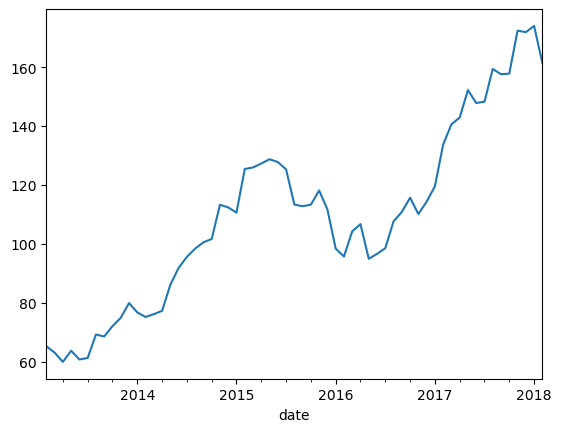

In [105]:
apple_data['close'].resample("M").mean().plot()

In [106]:
apple_data['close'].resample('Y').mean()

date
2013-12-31     67.237839
2014-12-31     92.264531
2015-12-31    120.039861
2016-12-31    104.604008
2017-12-31    150.585080
2018-12-31    171.594231
Freq: A-DEC, Name: close, dtype: float64

<Axes: xlabel='date'>

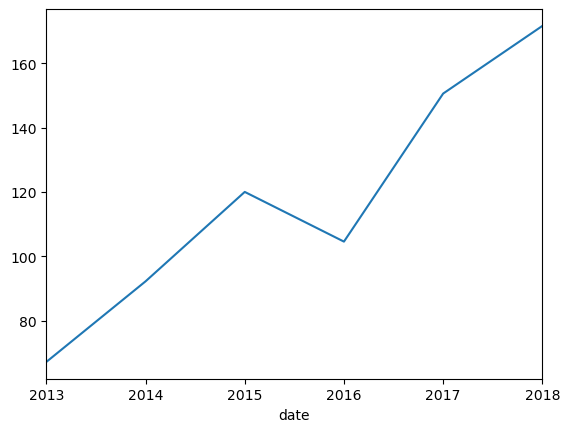

In [107]:
apple_data['close'].resample('Y').mean().plot()

In [108]:
# Quarter Base
apple_data['close'].resample('Q').mean()

date
2013-03-31     64.020291
2013-06-30     61.534692
2013-09-30     66.320670
2013-12-31     75.567478
2014-03-31     76.086293
2014-06-30     85.117475
2014-09-30     98.163311
2014-12-31    108.821016
2015-03-31    120.776721
2015-06-30    127.937937
2015-09-30    117.303438
2015-12-31    114.299297
2016-03-31     99.655082
2016-06-30     99.401250
2016-09-30    105.866094
2016-12-31    113.399048
2017-03-31    131.712500
2017-06-30    147.875397
2017-09-30    155.304603
2017-12-31    167.148254
2018-03-31    171.594231
Freq: Q-DEC, Name: close, dtype: float64

<Axes: xlabel='date'>

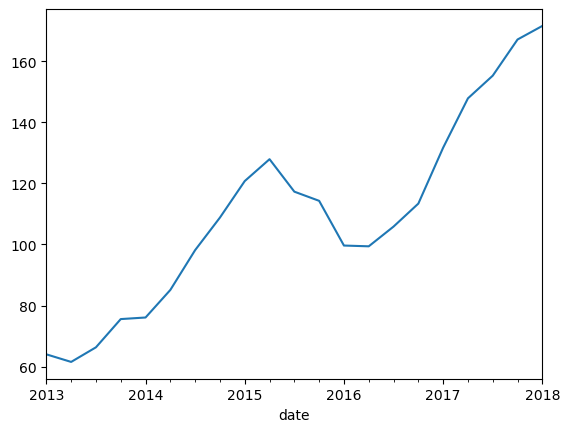

In [109]:
apple_data['close'].resample('Q').mean().plot()

## Cheacking if the closing prices of these tech companies (Amazon,Apple,Google,Microsoft) are correlated or not!

In [110]:
apple = pd.read_csv(company_list[0])
amzn = pd.read_csv(company_list[1])
google = pd.read_csv(company_list[2])
ms = pd.read_csv(company_list[3])

In [111]:
closing_price = pd.DataFrame()

In [112]:
closing_price['apple_close'] = apple['close']
closing_price['amzn_close'] = amzn['close']
closing_price['google_close'] = google['close']
closing_price['ms_close'] = ms['close']

In [113]:
closing_price

,apple_close,amzn_close,google_close,ms_close
0,67.8542,86.77,558.46,27.55
1,68.5614,84.92,559.99,27.86
2,66.8428,84.54,556.97,27.88
3,66.7156,84.94,567.16,28.03
4,66.6556,84.72,567.00,28.04
...,...,...,...,...
1254,167.7800,185.56,NaN,94.26
1255,160.5000,187.01,NaN,91.78
1256,156.4900,174.75,NaN,88.00
1257,163.0300,176.65,NaN,91.33


In [114]:
'''
    Pair-plot is all about , we can considering some pairs & 
    we are trying to plot scatterplot of it..
    
    Unique plots : 4c2 = 6 unique plots
    
    Total plots : 15 ( 6 unique + 6 mirror images of these 
    unique one + 3 diagonal plots(histogram))

'''


# Dis-advantages: 
## Can't be used when number of features are high.
## Cannot visualize higher dimensional patterns in 3-D and 4-D. 
## Only possible to view 2D patterns.



# NOTE: the diagnol elements are (histogram) for each feature.

'\n    Pair-plot is all about , we can considering some pairs & \n    we are trying to plot scatterplot of it..\n    \n    Unique plots : 4c2 = 6 unique plots\n    \n    Total plots : 15 ( 6 unique + 6 mirror images of these \n    unique one + 3 diagonal plots(histogram))\n\n'

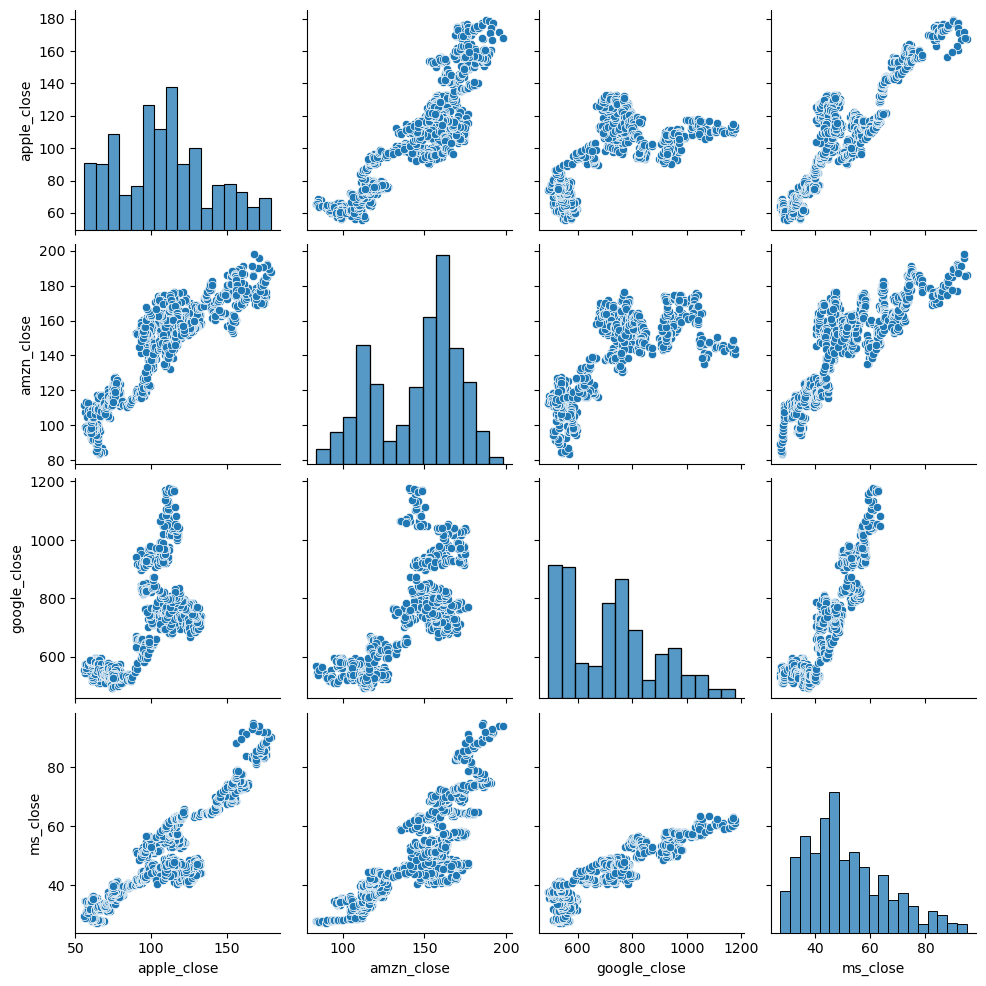

In [115]:
sns.pairplot(closing_price)

In [116]:
closing_price.corr()

,apple_close,amzn_close,google_close,ms_close
apple_close,1.000000,0.879580,0.640522,0.899689
amzn_close,0.879580,1.000000,0.751805,0.817059
google_close,0.640522,0.751805,1.000000,0.907011
ms_close,0.899689,0.817059,0.907011,1.000000


<Axes: >

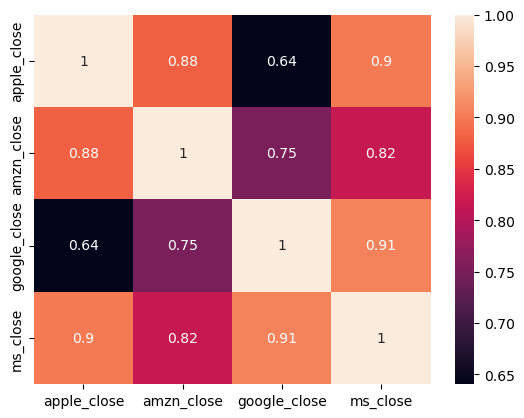

In [117]:
sns.heatmap(closing_price.corr(), annot=True)
# co-relation plot for stock prices

##### Conclusions : 
    Closing price of Google and Microsoft are well correlated
    & Closing price of Amazon and Microsoft have a co-relation of 0.96

## Analyze weather Daily change in closing price of stocks or daily return are co-related or not !

In [118]:
closing_price['apple_close']

0        67.8542
1        68.5614
2        66.8428
3        66.7156
4        66.6556
          ...   
1254    167.7800
1255    160.5000
1256    156.4900
1257    163.0300
1258    159.5400
Name: apple_close, Length: 1259, dtype: float64

In [119]:
closing_price['apple_close'].shift(1)

0            NaN
1        67.8542
2        68.5614
3        66.8428
4        66.7156
          ...   
1254    167.4300
1255    167.7800
1256    160.5000
1257    156.4900
1258    163.0300
Name: apple_close, Length: 1259, dtype: float64

In [120]:
# percentange change
(closing_price['apple_close'] - closing_price['apple_close'].shift(1))/closing_price['apple_close'].shift(1) * 100

0            NaN
1       1.042235
2      -2.506658
3      -0.190297
4      -0.089934
          ...   
1254    0.209043
1255   -4.339015
1256   -2.498442
1257    4.179181
1258   -2.140710
Name: apple_close, Length: 1259, dtype: float64

In [121]:
for col in closing_price.columns:
    closing_price[col + '_pct_change'] = (closing_price[col] - closing_price[col].shift(1))/closing_price[col].shift(1) * 100

In [122]:
closing_price

,apple_close,amzn_close,google_close,ms_close,apple_close_pct_change,amzn_close_pct_change,google_close_pct_change,ms_close_pct_change
0,67.8542,86.77,558.46,27.55,NaN,NaN,NaN,NaN
1,68.5614,84.92,559.99,27.86,1.042235,-2.132073,0.273968,1.125227
2,66.8428,84.54,556.97,27.88,-2.506658,-0.447480,-0.539295,0.071788
3,66.7156,84.94,567.16,28.03,-0.190297,0.473149,1.829542,0.538020
4,66.6556,84.72,567.00,28.04,-0.089934,-0.259006,-0.028211,0.035676
...,...,...,...,...,...,...,...,...
1254,167.7800,185.56,NaN,94.26,0.209043,-0.263370,NaN,-0.789391
1255,160.5000,187.01,NaN,91.78,-4.339015,0.781418,NaN,-2.631021
1256,156.4900,174.75,NaN,88.00,-2.498442,-6.555799,NaN,-4.118544
1257,163.0300,176.65,NaN,91.33,4.179181,1.087268,NaN,3.784091


In [123]:
closing_price.columns

Index(['apple_close', 'amzn_close', 'google_close', 'ms_close',
       'apple_close_pct_change', 'amzn_close_pct_change',
       'google_close_pct_change', 'ms_close_pct_change'],
      dtype='object')

In [124]:
close_p = closing_price[['apple_close_pct_change', 'amzn_close_pct_change',
       'google_close_pct_change', 'ms_close_pct_change']]

In [125]:
close_p

,apple_close_pct_change,amzn_close_pct_change,google_close_pct_change,ms_close_pct_change
0,NaN,NaN,NaN,NaN
1,1.042235,-2.132073,0.273968,1.125227
2,-2.506658,-0.447480,-0.539295,0.071788
3,-0.190297,0.473149,1.829542,0.538020
4,-0.089934,-0.259006,-0.028211,0.035676
...,...,...,...,...
1254,0.209043,-0.263370,NaN,-0.789391
1255,-4.339015,0.781418,NaN,-2.631021
1256,-2.498442,-6.555799,NaN,-4.118544
1257,4.179181,1.087268,NaN,3.784091


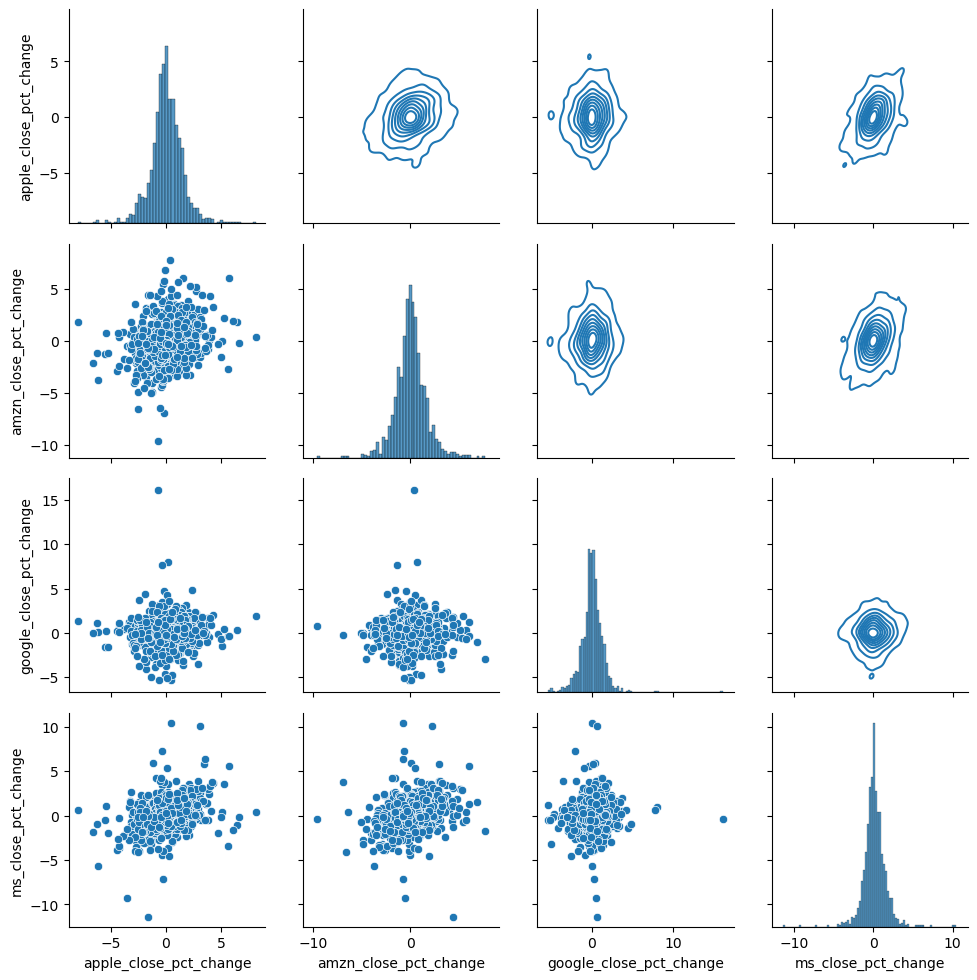

In [126]:
g = sns.PairGrid(data=close_p)
g.map_diag(sns.histplot)
g.map_lower(sns.scatterplot)
g.map_upper(sns.kdeplot)

##### Conclusion :
    While Comparing 'AAPL_close_pct_change' to 'AMZN_close_pct_change'  , it shows a linear relationship upto some extent..

In [127]:
close_p.corr()

,apple_close_pct_change,amzn_close_pct_change,google_close_pct_change,ms_close_pct_change
apple_close_pct_change,1.000000,0.263272,0.036202,0.366598
amzn_close_pct_change,0.263272,1.000000,0.027390,0.292124
google_close_pct_change,0.036202,0.027390,1.000000,0.038939
ms_close_pct_change,0.366598,0.292124,0.038939,1.000000


<Axes: >

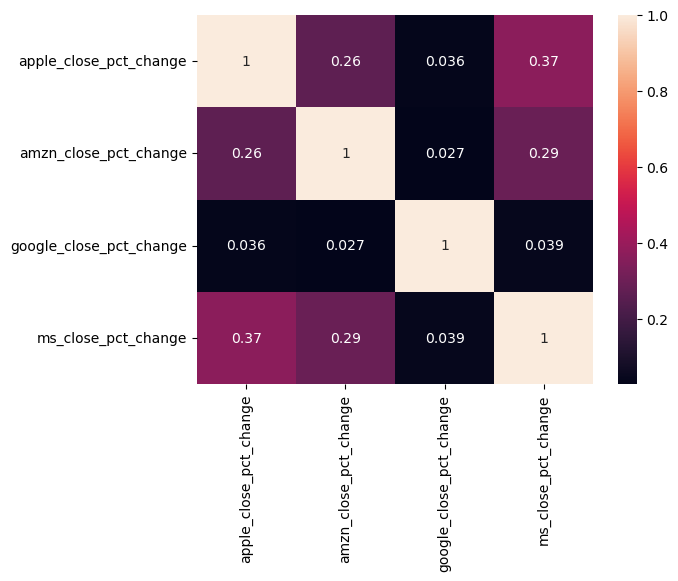

In [128]:
sns.heatmap(close_p.corr(), annot=True)